## Training a CNN on the MNIST Dataset 

In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


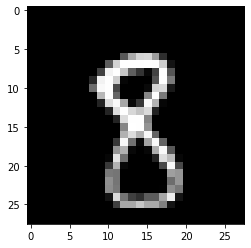

In [0]:
sample_img = X_train[np.random.randint(0,len(X_train))] 
plt.imshow(sample_img,cmap='gray')

In [0]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [0]:
# Normalizing image values in range [0,1]
X_train_sc = X_train/max(sample_img.ravel())
X_test_sc = X_test/max(sample_img.ravel())

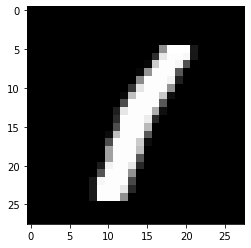

In [0]:
plt.imshow(X_train[np.random.randint(0,len(X_train))],cmap='gray')

In [0]:
# Reshaping input and validation data for training
X_train = X_train_sc.reshape(len(X_train),28,28,1) 
X_test = X_test_sc.reshape(len(X_test),28,28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
# Onehot encoding categorical data
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [0]:
# CREATING THE MODEL

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [0]:
# I normally use functional API because I'm more comfortable with it.
# Maxpooling was decreasing validation accuracy, so I didn't use it
# The dropout seed was set randomly. 

I = Input(shape=(28,28,1))
L = Conv2D(filters=32, kernel_size=3,activation='relu')(I)
L = BatchNormalization()(L)
L = Conv2D(filters=32, kernel_size=3,activation='relu')(L)
L = BatchNormalization()(L)
L = Conv2D(filters=32, kernel_size=3,activation='relu')(L)
L = BatchNormalization()(L)
L = Conv2D(filters=32, kernel_size=5,strides = 2,padding='same',activation='relu')(L)
L = BatchNormalization()(L)
L = Dropout(rate=0.4,seed=42)(L)

L = Conv2D(filters=64, kernel_size=3,activation='relu')(L)
L = BatchNormalization()(L)
L = Conv2D(filters=64, kernel_size=3,activation='relu')(L)
L = BatchNormalization()(L)
L = Conv2D(filters=64, kernel_size=3,activation='relu')(L)
L = BatchNormalization()(L)
L = Conv2D(filters=64, kernel_size=5,strides=2,padding='same',activation='relu')(L)
L = BatchNormalization()(L)
L = Dropout(rate=0.4,seed=42)(L)

L = Flatten()(L)

L = Dense(units=128,activation='relu')(L)
L = Dropout(rate=0.4,seed=42)(L)
L = Dense(units=10,activation='softmax')(L)

model = Model(inputs= I,outputs = L)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 22, 22, 32)        128 

#### Please note that I didn't use earlystopping because the reduction rate of loss(both training and validation) was haphazard due to high dropout.

In [0]:
#from tensorflow.keras.callbacks import EarlyStopping
#overfit_ctl = EarlyStopping(monitor='val_loss',patience=5)

Fit_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),callbacks=[overfit_ctl])

Epoch 1/20
1875/1875 [==============================] - 285s 152ms/step - loss: 0.1970 - accuracy: 0.9406 - val_loss: 0.0685 - val_accuracy: 0.9819
Epoch 2/20
1875/1875 [==============================] - 286s 152ms/step - loss: 0.0812 - accuracy: 0.9765 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 3/20
1875/1875 [==============================] - 286s 152ms/step - loss: 0.0675 - accuracy: 0.9809 - val_loss: 0.0316 - val_accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 287s 153ms/step - loss: 0.0572 - accuracy: 0.9837 - val_loss: 0.0516 - val_accuracy: 0.9885
Epoch 5/20
1875/1875 [==============================] - 288s 154ms/step - loss: 0.0486 - accuracy: 0.9864 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 6/20
1875/1875 [==============================] - 284s 151ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0284 - val_accuracy: 0.9924
Epoch 7/20
1875/1875 [==============================] - 282s 151ms/step - loss: 0.0380 - accuracy: 0.9894 - val_

### We obtain a model acuracy of 99.57% validation accuracy(could have stopped at 15, but just to be sure it can't be improved, I let it run for a few more epochs).

Model fitting history: <tensorflow.python.keras.callbacks.History object at 0x7f3c429e2240>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
ERROR! Session/line number was not unique in database. History logging moved to new session 60


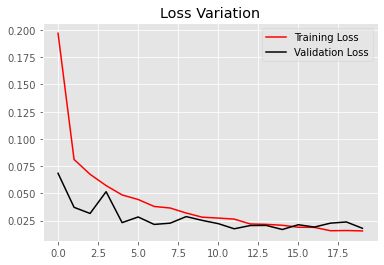

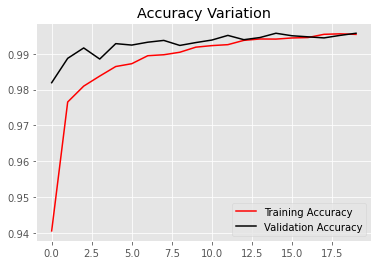

In [0]:
print("Model fitting history:", Fit_history)
print(Fit_history.history.keys())

plt.style.use('ggplot')

# Plotting Losses
plt.plot(Fit_history.history['loss'],'r', label='Training Loss')
plt.plot(Fit_history.history['val_loss'],'k', label='Validation Loss')
plt.title('Loss Variation')
plt.legend()
plt.show()

# Plotting accuracies
plt.plot(Fit_history.history['accuracy'], 'r',  label='Training Accuracy')
plt.plot(Fit_history.history['val_accuracy'],'k', label='Validation Accuracy')
plt.title('Accuracy Variation')
plt.legend()
plt.show()
